### Step 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [5]:
# Remove outliers (example using Z-score)
from scipy.stats import zscore

z_scores = np.abs(zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]


In [6]:
df_no_outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017.0,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,4018.0,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,4019.0,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,4020.0,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [7]:
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

In [8]:
df_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.707275,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,1.708139,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,1.709004,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,1.709869,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


### Step 2: Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Descriptive statistics
print(df_scaled.describe())

                ID#       Balance    Qual_miles     cc1_miles  cc2_miles  \
count  3.630000e+03  3.630000e+03  3.630000e+03  3.630000e+03     3630.0   
mean  -1.156100e-16 -1.315140e-18  3.581616e-16  5.708626e-15        0.0   
std    1.000138e+00  1.000138e+00  1.000138e+00  1.000138e+00        0.0   
min   -1.766325e+00 -9.781017e-01 -1.588691e-01 -7.556644e-01        0.0   
25%   -8.553271e-01 -6.955774e-01 -1.588691e-01 -7.556644e-01        0.0   
50%    9.829343e-03 -3.442363e-01 -1.588691e-01 -7.556644e-01        0.0   
75%    8.637416e-01  3.491287e-01 -1.588691e-01  7.598393e-01        0.0   
max    1.710734e+00  5.016969e+00  9.690039e+00  2.275343e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     3630.0  3.630000e+03  3.630000e+03       3.630000e+03   
mean         0.0 -5.994898e-16 -3.205884e-16      -8.214886e-16   
std          0.0  1.000138e+00  1.000138e+00       1.000138e+00   
min          0.0 -7.886258e-01 -1.268350e+00   

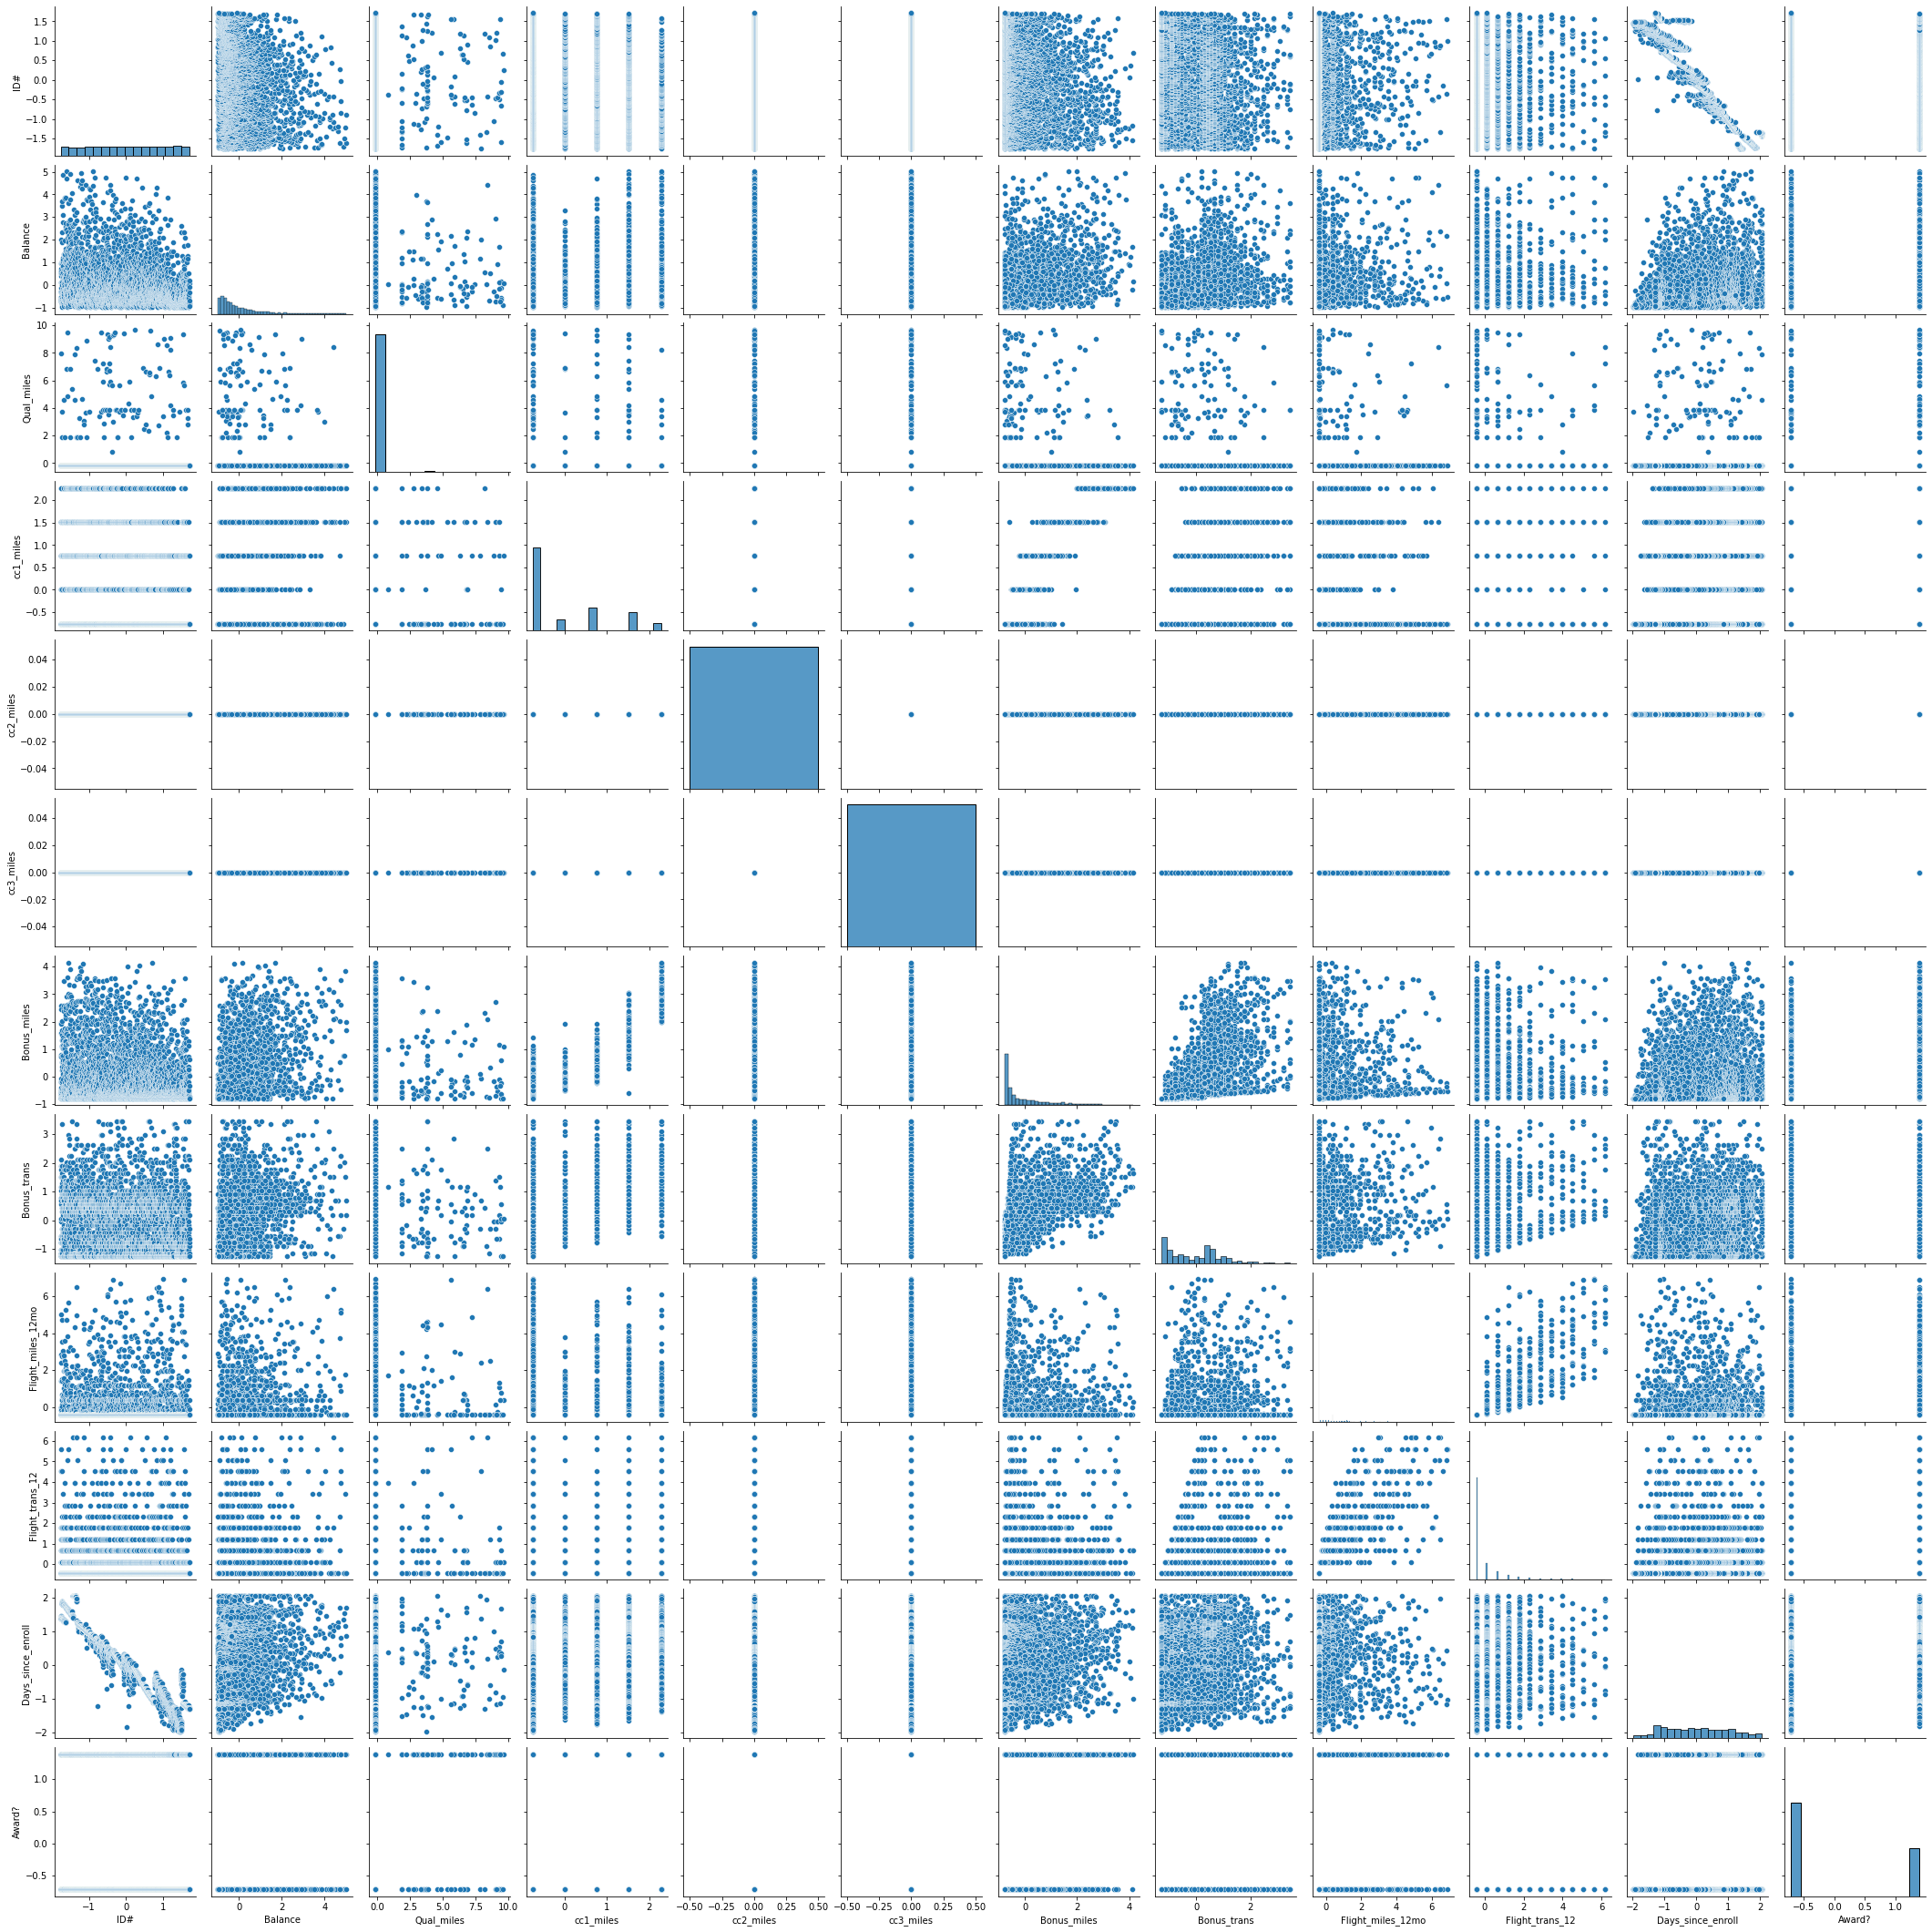

In [11]:

# Visualizations
sns.pairplot(df_scaled)
plt.show()

### Step 3: Implementing Clustering Algorithms

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN

In [13]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

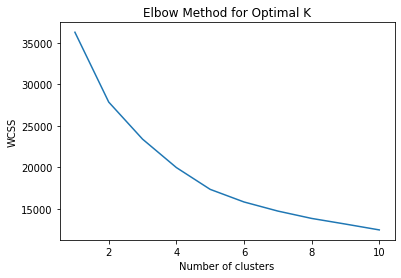

In [14]:
# Elbow method plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Apply K-Means with optimal K (let's assume 3 from the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [16]:
kmeans_labels

array([1, 1, 1, ..., 1, 1, 1])

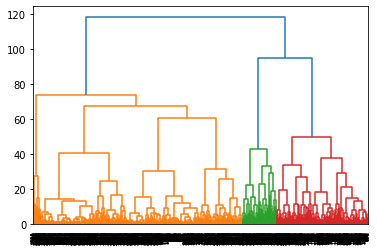

In [17]:
# Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
dendrogram(linked)
plt.show()

In [18]:
# Apply Hierarchical Clustering
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')

In [19]:
hierarchical_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [20]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [21]:
dbscan_labels

array([ 0,  0,  0, ..., -1, 24,  0], dtype=int64)

### Step 4: Cluster Analysis and Interpretation

In [22]:
# Print cluster labels
print("K-Means Labels:")
print(kmeans_labels)

K-Means Labels:
[1 1 1 ... 1 1 1]


In [23]:
print("Hierarchical Labels:")
print(hierarchical_labels)

Hierarchical Labels:
[1 1 1 ... 1 1 1]


In [24]:
print("DBSCAN Labels:")
print(dbscan_labels)

DBSCAN Labels:
[ 0  0  0 ... -1 24  0]


In [25]:
# Analyze the clusters (examples)
df_scaled['KMeans_Cluster'] = kmeans_labels
df_scaled['Hierarchical_Cluster'] = hierarchical_labels
df_scaled['DBSCAN_Cluster'] = dbscan_labels

print(df_scaled.groupby('KMeans_Cluster').mean())
print(df_scaled.groupby('Hierarchical_Cluster').mean())
print(df_scaled.groupby('DBSCAN_Cluster').mean())

                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0              -0.441497  0.593798   -0.009870   1.140319        0.0   
1               0.248542 -0.386832   -0.049720  -0.614383        0.0   
2              -0.100547  0.597479    0.483967   0.017243        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0     1.003621     0.828119          -0.177473   
1                     0.0    -0.569477    -0.520594          -0.250383   
2                     0.0     0.268016     0.667110           3.040749   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                     -0.179853           0.453817  0.468600   
1                     -0.241708          -0.258187 -0.319763   
2           

### Step 5: Visualization

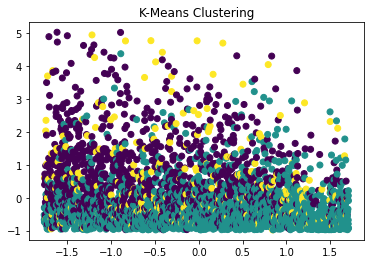

In [26]:
# K-Means Scatter Plot
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

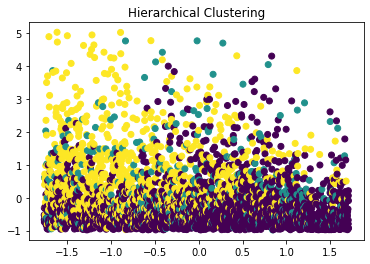

In [27]:
# Hierarchical Scatter Plot
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

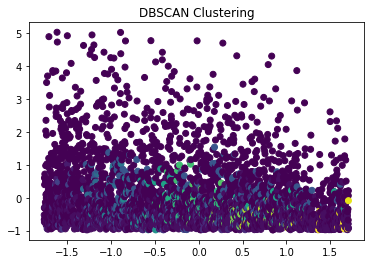

In [28]:
# DBSCAN Scatter Plot
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


### Step 6: Evaluation and Performance Metrics

In [29]:
# Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

K-Means Silhouette Score: 0.25810636314722246
Hierarchical Silhouette Score: 0.22973938421900475
DBSCAN Silhouette Score: 0.14281427639731328
